# Análise Ranking CCONF

Neste notebook vamos analisar a aba municípios da planilha que contém os dados sobre a aplicação dos critérios elaborados pela CCONF. Vamos lá!

## Prepação: importando os dados da planilha
Começamos importando os dados da planilha para dentro de um Data Frame para podermos manipulá-los no python:

Vamos criar duas variáveis que guardam as colunas que: 
a) São relacionadas à capag:
b) Não são relacionadas à capag

In [361]:
col_capag = "S:W, Y:AA, AL:AN, AS, AU: BA, BD:BF, BM, BO, BQ, BS, BU"
col_nao_capag = "B:R,X,AB:AK, AO:AR, AT, BB:BC, BG:BL, BN, BP, BR, BT"
col_gerais = "A,BV, BW,BX,BY,BZ, CA"
col_nomes = "BV, BZ"
col_id = "A"

Criando os Data Frames usando a library pandas

In [362]:
import pandas as pd
import numpy as np

data_capag = pd.read_excel(r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols =  col_capag + col_nomes, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"] )
#print(data_capag.dtypes)
#print(data_capag.shape)
#print(data_capag.head(5))

data_nao_capag = pd.read_excel(r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols =  col_nao_capag + col_nomes, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
#print(data_nao_capag.dtypes)
#print(data_nao_capag.shape)
#print(data_nao_capag.head(5))

data_total = pd.read_excel(r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols =  col_nao_capag + col_capag, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
#print(data_total.dtypes)
#print(data_total.shape)
#print(data_total.head(5))

data_total_nomes = pd.read_excel(r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols = col_nao_capag + col_capag, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
#print(data_total_nomes.dtypes)
#print(data_total_nomes.shape)
#print(data_total_nomes.head(5))

## Análise Exploratória

Antes de tudo, vamos criar uma função para calcular a função de distribuição acumulada, ela será útil para entendermos a dinâmica de como os entes passam ou não em cada grupo de testes

In [363]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


a.	Qual a média/proporção de cada um dos testes?

In [364]:
medias_total = data_total.mean(axis=0)
print(medias_total)

D1_00001    0.974282
D1_00002    0.848420
D1_00003    0.967187
D1_00004    0.954921
D1_00005    0.000000
              ...   
D4_00011         NaN
D4_00012    0.531070
D4_00013         NaN
D4_00014    0.612069
D4_00016    0.530891
Length: 66, dtype: float64


a.1	Qual a média/proporção de cada um dos testes não capag?

In [365]:
medias_ncapag = data_nao_capag.mean(axis=0)
print(medias_ncapag)

D1_00001    0.974282
D1_00002    0.848420
D1_00003    0.967187
D1_00004    0.954921
D1_00005    0.000000
D1_00006    0.461512
D1_00007    0.573994
D1_00008    0.437518
D1_00009    0.463578
D1_00010    0.000000
D1_00011    0.910973
D1_00012    0.843858
D1_00013    0.872953
D1_00014    0.952191
D1_00015    0.000000
D2_00001    0.580280
D2_00002    0.303161
D2_00008    0.834231
D2_00013    0.791487
D2_00014    0.816451
D2_00015    0.823815
D2_00016         NaN
D2_00017         NaN
D2_00018         NaN
D2_00019    0.818068
D2_00020         NaN
D2_00021         NaN
D2_00022    0.778915
D2_00029    0.728448
D2_00030    0.749102
D2_00031    0.746588
D2_00032    0.222881
D3_00001    0.560165
D3_00010    0.564296
D3_00011    0.807471
D4_00002    0.502874
D4_00003    0.498204
D4_00004    0.732938
D4_00005    0.410560
D4_00006    0.456178
D4_00007    0.478807
D4_00009         NaN
D4_00011         NaN
D4_00013         NaN
dtype: float64


a.1	Qual a média/proporção de cada um dos testes  capag?

In [366]:
medias_capag = data_capag.mean(axis=0)
print(medias_capag)

D2_00003    0.750000
D2_00004    0.800647
D2_00005    0.826868
D2_00006    0.834231
D2_00007    0.833693
D2_00010    0.830819
D2_00011    0.829741
D2_00012    0.739224
D2_00023    0.827945
D2_00024    0.828305
D2_00028    0.728269
D2_00033    0.736710
D3_00002    0.796516
D3_00003    0.751616
D3_00005    0.772270
D3_00006    0.400682
D3_00007    0.732759
D3_00008    0.543103
D3_00009    0.510955
D3_00012    0.910560
D3_00013    0.836207
D4_00001    0.549389
D4_00008    0.686422
D4_00010    0.558728
D4_00012    0.531070
D4_00014    0.612069
dtype: float64


b.	Qual a distribuição das notas (somatório de todas as colunas)?
i.	Levando em consideração apenas os testes da CAPAG (colunas em amarelo)

0       26
1       26
2       26
3       26
4       26
        ..
5563     0
5564     0
5565     0
5566     0
5567     0
Name: sum, Length: 5568, dtype: int64


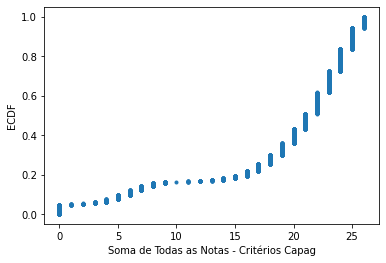

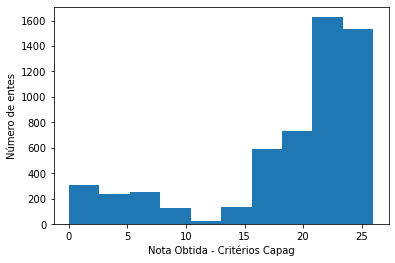

In [367]:
data_capag["sum"] = data_capag.sum(axis=1)
print(data_capag["sum"])

#Plotando o ECDF: vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt

x_dist, y_dist = ecdf(data_capag['sum'])

# Generate plot
_= plt.plot(x_dist, y_dist, marker = ".", linestyle = 'none')

# Label the axes
_= plt.xlabel('Soma de Todas as Notas - Critérios Capag')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
ii.	Levando em consideração apenas os testes que não são da CAPAG (colunas não pintadas)

0       33.0
1       32.8
2       32.6
3       32.6
4       32.5
        ... 
5563     1.0
5564     1.0
5565     1.0
5566     0.8
5567     0.8
Name: sum, Length: 5568, dtype: float64


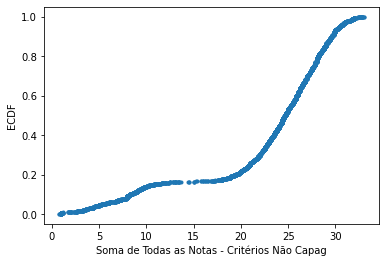

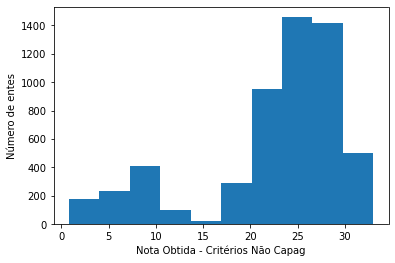

In [368]:
data_nao_capag["sum"] = data_nao_capag.sum(axis=1)
print(data_nao_capag["sum"])

#Plotando o ECDF: vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt

x_dist_nc, y_dist_nc = ecdf(data_nao_capag['sum'])

# Generate plot
_= plt.plot(x_dist_nc, y_dist_nc, marker = ".", linestyle = 'none')

# Label the axes
_= plt.xlabel('Soma de Todas as Notas - Critérios Não Capag')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_nao_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Não Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
iii.	Levando em consideração todos os testes

0       55.0
1       54.8
2       54.6
3       54.6
4       54.5
        ... 
5563     1.0
5564     1.0
5565     1.0
5566     0.8
5567     0.8
Name: sum, Length: 5568, dtype: float64


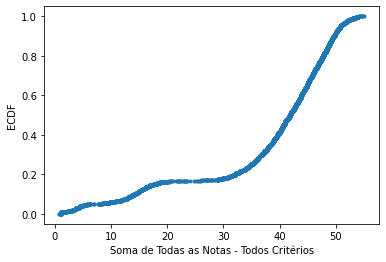

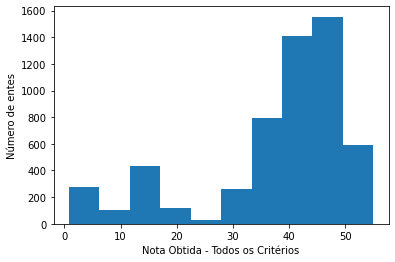

In [369]:
data_total["sum"] = data_total.sum(axis=1)
print(data_total["sum"])

#Plotando o ECDF: vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt

x_dist_total, y_dist_total = ecdf(data_total['sum'])

# Generate plot
_= plt.plot(x_dist_total, y_dist_total, marker = ".", linestyle = 'none')

# Label the axes
_= plt.xlabel('Soma de Todas as Notas - Todos Critérios')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_total['sum'])
_=plt.xlabel('Nota Obtida - Todos os Critérios')
_=plt.ylabel('Número de entes')
plt.show()


## Simulações de classificação 

Vamos agora realizar 3 tipos de simulações. 

### a.	Alternativa I: classificação conjunta em duas etapas

#### i.	Primeiro,  somando todos os testes relacionados à CAPAG

##### i.	1.	Caso o município tenha resultado maior ou igual a x, classifique-o na zona 1


In [370]:
nota_corte_capag = 20

#Gerando coluna com aprovados 
data_capag['Aprovado'] = np.where(data_capag["sum"]>= nota_corte_capag, True, False)
#print(data_capag['Aprovado'].head(200))

# Calculando percentual de aprovados 
n_entes = data_capag.shape[0]
print('Total de Entes :' + str(n_entes))
num_aprovados = sum(data_capag['Aprovado'])
print('O número de entes de aprovados na zona 1 com nota de corte de ' + str(nota_corte_capag) + ' seria de: ' + str(num_aprovados))
print('O percentual de aprovados na zona 1 seria de : ' + "{:.2%}".format(num_aprovados/n_entes))


Total de Entes :5568
O número de entes de aprovados na zona 1 com nota de corte de 20 seria de: 3565
O percentual de aprovados na zona 1 seria de : 64.03%


#### ii.	Somando os testes não relacionados à CAPAG
##### 1.	Se o ente estiver na zona 1
    a.	Caso o ente tenha resultado maior ou igual a y1, classifique-o com nota final A
    b.	Caso o ente tenha resultado maior ou igual a y2 e menor que y1, classifique-o com nota final B
    c.	Caso o ente tenha resultado menor que y3, classifique-o com nota final C (erro: tenha resultado menor do que y2)

##### 2.	Se o ente estiver na zona 2

    a.	Caso o ente tenha resultado maior ou igual a y3, classifique-o com nota final D
    b.	Caso o ente tenha resultado menor que y3, classifique-o com nota final E


In [371]:
# Selecionando a coluna dos aprovados/reprovados na zona 1
df_aprovados = data_capag.Aprovado

# Trazendo a coluna dos aprovados nos critérios de Capag (zona 1) para o Data Frame que contém os critérios não relacionados à Capag 
data_nao_capag_c_a = pd.concat([data_nao_capag, df_aprovados], axis=1)

#verificando a concatenação
data_nao_capag_c_a.columns
print(data_nao_capag_c_a.head(10))

# calculando a nota dos critérios não capag

nota_corte_y1 = 30
nota_corte_y2 = 25
nota_corte_y3 = 20

# criando a lista das 5 condições
conditions = [
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y1),
    (data_nao_capag_c_a['Aprovado'] ) & ((data_nao_capag_c_a['sum'] < nota_corte_y1) & (data_nao_capag_c_a['sum'] >= nota_corte_y2)),
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] <  nota_corte_y2),        
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y3),
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] < nota_corte_y3)
    ]

# criando a lista de valores que queremos associar a cada condição
values = ['A', 'B', 'C', 'D', 'E']

# create a new column and use np.select to assign values to it using our lists as arguments
data_nao_capag_c_a['capag'] = np.select(conditions, values)

   D1_00001  D1_00002  D1_00003  D1_00004  D1_00005  D1_00006  D1_00007  \
0       1.0         1       1.0       1.0         0       1.0         1   
1       1.0         1       1.0       1.0         0       1.0         1   
2       1.0         1       1.0       1.0         0       1.0         1   
3       1.0         1       1.0       1.0         0       0.8         1   
4       1.0         1       1.0       1.0         0       0.5         1   
5       1.0         1       1.0       1.0         0       1.0         1   
6       1.0         1       1.0       1.0         0       0.7         1   
7       1.0         1       1.0       1.0         0       1.0         1   
8       1.0         1       1.0       1.0         0       1.0         1   
9       1.0         1       1.0       1.0         0       1.0         1   

   D1_00008  D1_00009  D1_00010  ...  D4_00004  D4_00005  D4_00006  D4_00007  \
0       1.0       1.0         0  ...         1         1         1         1   
1       1.0   

###### Tabela de Classificação Final - Alternativa 1

In [378]:
# Mostra a Tabela final com a classificação
#data_nao_capag_c_a.head(4000)

class_alt1_final = data_nao_capag_c_a.groupby(['UF', 'capag']).size().to_frame('size').reset_index().sort_values(['UF', 'capag'], ascending=[True, True])
print(class_alt1_final)

     UF capag  size
0    AC     B     9
1    AC     C     1
2    AC     D     4
3    AC     E     8
4    AL     B     3
..   ..   ...   ...
117  SP     E    51
118  TO     B     3
119  TO     C    17
120  TO     D    62
121  TO     E    57

[122 rows x 3 columns]


###### Exportando a simulação para o Excel

In [381]:
class_alt1_final.to_excel("sim_alt1.xlsx",
             sheet_name='Sheet_name_1')